Excercise 6.1
=======

Poissson process with absolute refractoriness:

\begin{equation}
    p^{\text{ISI}}(T) = \Theta(t-\tau_{\text{ref}}) \nu \exp{(-\nu(t-\tau_{\text{ref}}))}
\end{equation}

The power spectrum is given by:

\begin{equation}
    P_T(\omega) = \nu_i \Re{\left\{ \frac{1 + \tilde{p}^{\text{ISI}}(\omega)}{1 - \tilde{p}^{\text{ISI}}(\omega)} \right\}} + 2\pi\nu^2\delta(\omega)
\end{equation}

Let us start with calculating $\tilde{p}^{\text{ISI}}(\omega)$:

\begin{align}
    \tilde{p}^{\text{ISI}}(\omega) &= \nu \int_0^\infty \Theta(t-\tau_{\text{ref}}) \exp{(-\nu(t-\tau_{\text{ref}}))} \exp{(-i\omega t)} dt \\
    &= \nu \int_{\tau_{\text{ref}}}^\infty \exp{(-\nu(t-\tau_{\text{ref}}))} \exp{(-i\omega t)} dt \\    
    &= \nu e^{\nu\tau_{\text{ref}}} \int_{\tau_{\text{ref}}}^\infty \exp{(-t(\nu + i\omega))} dt \\
    &= - \nu e^{\nu\tau_{\text{ref}}} \frac{1}{\nu + i\omega} \exp{(-t(\nu + i\omega))} \vert_{\tau_{\text{ref}}}^{\infty} \\
    &= \frac{\nu}{\nu + i\omega} e^{-i\omega\tau_{\text{ref}}}
\end{align}

With this we are able to calculate the power spectrum:

\begin{align}
    P_T(\omega) &= \nu_i \Re{\left\{ \frac{1 + \tilde{p}^{\text{ISI}}(\omega)}{1 - \tilde{p}^{\text{ISI}}(\omega)} \right\}} + 2\pi\nu^2\delta(\omega) \\
    &= \nu_i \Re{\left\{ \frac{1 + \frac{\nu}{\nu + i\omega} e^{-i\omega\tau_{\text{ref}}}}{1 - \frac{\nu}{\nu + i\omega} e^{-i\omega\tau_{\text{ref}}}} \right\}} + 2\pi\nu^2\delta(\omega) \\
    &= \nu_i \Re{\left\{ \frac{\nu + i\omega + \nu e^{-i\omega\tau_{\text{ref}}}}{\nu + i\omega - \nu e^{-i\omega\tau_{\text{ref}}}} \right\}} + 2\pi\nu^2\delta(\omega)
\end{align}

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np

In [2]:
delta = lambda x: 10000 if x == 0 else 0 # simplified delta function
omega = np.linspace(-50,50,4401) # generate time vector
power_pois = []
power_refrac = []
nu = 1000
tau = 5
for i in range(0,len(omega)):
    power = nu + 2*np.pi*nu**2 * delta(omega[i])
    power_ref = nu*np.real((nu + 1j*omega[i] + nu*np.exp(-1j*omega[i]*tau))/(nu + 1j*omega[i] - nu*np.exp(-1j*omega[i]*tau))) + 2*np.pi*nu**2*delta(omega[i])
    power_pois.append(power)
    power_refrac.append(power_ref)

/Users/knl/.virtualenvs/bic/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in cdouble_scalars
/Users/knl/.virtualenvs/bic/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars


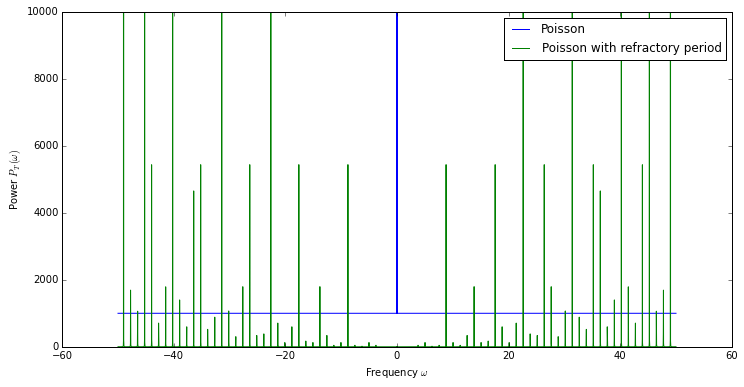

In [3]:
plt.plot(omega,power_pois,label='Poisson')
plt.plot(omega,power_refrac,label='Poisson with refractory period')
plt.ylim([-1,10000])
plt.legend()
plt.xlabel('Frequency $\omega$')
plt.ylabel('Power $P_T(\omega)$')

We observe that the Poisson process with refractory period shows a much better signal-to-noise ratio in the regime of small frequencies. However there are regions where the ratio is much larger than the one of a pure Poisson process. Because of this the answer to the question which process to use for transmitting a low frequency signal depends on the exact frequency regime.